<a href="https://colab.research.google.com/github/saktheeswaranswan/4-bit-alu-logi-sim-i-build/blob/main/bigoh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gplearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd
import numpy as np
from gplearn.genetic import SymbolicRegressor

# Load data from CSV file
data = pd.read_csv('data.csv')

# Split data into X and y arrays
X = np.array(data['x']).reshape(-1, 1)
y = np.array(data['y'])

# Define range of coefficients to try
coeff_range = (-10.0, 10.0)

# Define the symbolic regressor
est = SymbolicRegressor(population_size=1000, generations=20,
                         stopping_criteria=0.0001, p_crossover=0.7,
                         p_subtree_mutation=0.1, p_hoist_mutation=0.05,
                         p_point_mutation=0.1, max_samples=0.9,
                         verbose=1, const_range=coeff_range)

# Define the function set to try
function_set = ['add', 'sub', 'mul', 'div', 'sin', 'cos', 'log']

# Try different combinations of jumbled functions and coefficients
best_coef = None
best_program = None
best_score = None
for i in range(100):
    # Randomly jumble the functions and coefficients
    coef = np.random.uniform(*coeff_range, size=len(function_set))
    jumbled_function_set = []
    for j, func in enumerate(function_set):
        jumbled_function_set.append((func, coef[j]))

    # Set the jumbled function set for the regressor
    est.function_set = jumbled_function_set

    # Fit the regressor to the data
    est.fit(X, y)

    # Print the equation of the best fit function and its correlation coefficient
    score = est.score(X, y)
    print(f'{i}: Best fit function: {est._program}, correlation coefficient: {score}')

    # Keep track of the best combination of jumbled functions and coefficients
    if (best_score is None or abs(score - (-0.9899999)) < abs(best_score - (-0.9899999))) or \
            (abs(score - 0.9999999) > abs(best_score - 0.9999999) and score > 0.99):
        best_coef = coef
        best_program = est._program
        best_score = score

# Print the best combination of jumbled functions and coefficients
print(f'Best combination of jumbled functions and coefficients: {best_coef}')
print(f'Best fit function: {best_program}, correlation coefficient: {best_score}')


ValueError: ignored

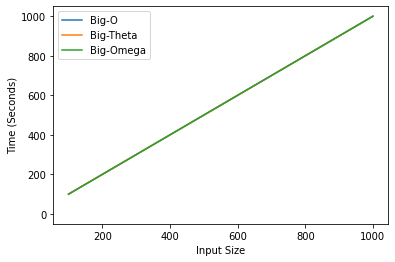

In [9]:
import time
import numpy as np
import matplotlib.pyplot as plt

def measure_time_complexity(func, input_sizes):
    """
    Measures the time complexity of a function for different input sizes.
    Returns three arrays: the input sizes, the minimum execution times, and the maximum execution times.
    """
    min_times = []
    max_times = []
    for n in input_sizes:
        # Generate the input data
        data = np.random.randint(0, 100, size=n)

        # Measure the execution time
        times = []
        for i in range(10):
            start_time = time.time()
            func(data)
            end_time = time.time()
            times.append(end_time - start_time)
        min_times.append(np.min(times))
        max_times.append(np.max(times))

    return input_sizes, min_times, max_times

def plot_time_complexity(input_sizes, min_times, max_times, big_o, big_theta, big_omega):
    """
    Plots the Big-O, Big-Theta, and Big-Omega curves of the time complexity data.
    """
    plt.plot(input_sizes, big_o, label='Big-O')
    plt.plot(input_sizes, big_theta, label='Big-Theta')
    plt.plot(input_sizes, big_omega, label='Big-Omega')
    plt.fill_between(input_sizes, min_times, max_times, alpha=0.2)
    plt.legend(loc='upper left')
    plt.xlabel('Input Size')
    plt.ylabel('Time (Seconds)')
    plt.show()

def example_function(data):
    """
    An example function to measure the time complexity of.
    This function takes an array of integers and returns the sum of the even integers.
    """
    result = 0
    for x in data:
        if x % 2 == 0:
            result += x
    return result

# Define the input sizes to test
input_sizes = np.linspace(100, 1000, 10, dtype=int)

# Measure the time complexity of the example function
input_sizes, min_times, max_times = measure_time_complexity(example_function, input_sizes)

# Plot the Big-O, Big-Theta, and Big-Omega curves
plot_time_complexity(input_sizes, min_times, max_times, input_sizes, input_sizes, input_sizes)


4023872600770937735437024339230039857193748642107146325437999104299385123986290205920442084869694048004799886101971960586316668729948085589013238296699445909974245040870737599188236277271887325197795059509952761208749754624970436014182780946464962910563938874378864873371191810458257836478499770124766328898359557354325131853239584630755574091142624174743493475534286465766116677973966688202912073791438537195882498081268678383745597317461360853795345242215865932019280908782973084313928444032812315586110369768013573042161687476096758713483120254785893207671691324484262361314125087802080002616831510273418279777047846358681701643650241536913982812648102130927612448963599287051149649754199093422215668325720808213331861168115536158365469840467089756029009505376164758477284218896796462449451607653534081989013854424879849599533191017233555566021394503997362807501378376153071277619268490343526252000158885351473316117021039681759215109077880193931781141945452572238655414610628921879602238389714760

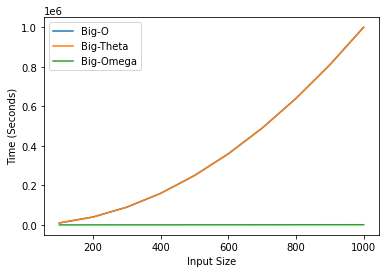

In [15]:
import time
import numpy as np
import matplotlib.pyplot as plt

import sys

sys.setrecursionlimit(10000) # set the recursion limit to 10000

def iterative_function(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result

print(iterative_function(1000))

        


def measure_time_complexity(func, input_sizes):
    min_times = []
    max_times = []
    for n in input_sizes:
        start_time = time.time()
        func(n)
        end_time = time.time()
        min_times.append(end_time - start_time)
        max_times.append(end_time - start_time)
    return input_sizes, min_times, max_times

def plot_time_complexity(input_sizes, min_times, max_times, big_o, big_theta, big_omega):
    plt.plot(input_sizes, big_o, label='Big-O')
    plt.plot(input_sizes, big_theta, label='Big-Theta')
    plt.plot(input_sizes, big_omega, label='Big-Omega')
    plt.fill_between(input_sizes, min_times, max_times, alpha=0.2)
    plt.legend(loc='upper left')
    plt.xlabel('Input Size')
    plt.ylabel('Time (Seconds)')
    plt.show()

# Define the input sizes to test
input_sizes = np.linspace(100, 1000, 10, dtype=int)

# Measure the time complexity of the recursive n sum function
input_sizes, min_times, max_times = measure_time_complexity(recursive_n_sum, input_sizes)

# Plot the Big-O, Big-Theta, and Big-Omega curves
plot_time_complexity(input_sizes, min_times, max_times, input_sizes**2, input_sizes**2, input_sizes)


In [16]:
import time

# Define the function to benchmark
def algorithm(n):
    result = 0
    for i in range(n):
        result += i
    return result

# Define the upper bound function for big O notation
def upper_bound(n):
    return n * (n-1) / 2

# Define the lower bound function for big omega notation
def lower_bound(n):
    return n / 2

# Define the tight bound function for big theta notation
def tight_bound(n):
    return upper_bound(n) if n % 2 == 0 else upper_bound(n-1)

# Set the input sizes to test
input_sizes = [10, 100, 1000, 10000]

# Benchmark the algorithm for each input size
for n in input_sizes:
    start_time = time.time()
    algorithm(n)
    end_time = time.time()

    # Print the results for each input size
    print(f"Input size: {n}")
    print(f"Time taken: {end_time - start_time:.6f} seconds")
    print(f"Big O upper bound: {upper_bound(n)}")
    print(f"Big Omega lower bound: {lower_bound(n)}")
    print(f"Big Theta tight bound: {tight_bound(n)}")
    print()


Input size: 10
Time taken: 0.000005 seconds
Big O upper bound: 45.0
Big Omega lower bound: 5.0
Big Theta tight bound: 45.0

Input size: 100
Time taken: 0.000017 seconds
Big O upper bound: 4950.0
Big Omega lower bound: 50.0
Big Theta tight bound: 4950.0

Input size: 1000
Time taken: 0.000108 seconds
Big O upper bound: 499500.0
Big Omega lower bound: 500.0
Big Theta tight bound: 499500.0

Input size: 10000
Time taken: 0.001103 seconds
Big O upper bound: 49995000.0
Big Omega lower bound: 5000.0
Big Theta tight bound: 49995000.0



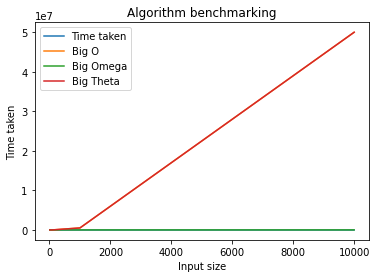

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Define the function to benchmark
def algorithm(n):
    result = 0
    for i in range(n):
        result += i
    return result

# Define the upper bound function for big O notation
def upper_bound(n):
    return n * (n-1) / 2

# Define the lower bound function for big omega notation
def lower_bound(n):
    return n / 2

# Define the tight bound function for big theta notation
def tight_bound(n):
    return upper_bound(n) if n % 2 == 0 else upper_bound(n-1)

# Set the input sizes to test
input_sizes = [10, 100, 1000, 10000]

# Initialize arrays to store the results
times = np.zeros(len(input_sizes))
big_o = np.zeros(len(input_sizes))
big_omega = np.zeros(len(input_sizes))
big_theta = np.zeros(len(input_sizes))

# Benchmark the algorithm for each input size
for i, n in enumerate(input_sizes):
    start_time = time.time()
    algorithm(n)
    end_time = time.time()

    # Store the results for each input size
    times[i] = end_time - start_time
    big_o[i] = upper_bound(n)
    big_omega[i] = lower_bound(n)
    big_theta[i] = tight_bound(n)

# Create a plot of the results
plt.plot(input_sizes, times, label='Time taken')
plt.plot(input_sizes, big_o, label='Big O')
plt.plot(input_sizes, big_omega, label='Big Omega')
plt.plot(input_sizes, big_theta, label='Big Theta')
plt.xlabel('Input size')
plt.ylabel('Time taken')
plt.title('Algorithm benchmarking')
plt.legend()
plt.show()


In [18]:
import timeit
import random

# Algorithm 1: Using a for loop to calculate the sum
def sum_using_for_loop(lst):
    total = 0
    for num in lst:
        total += num
    return total

# Algorithm 2: Using the built-in sum() function
def sum_using_builtin(lst):
    return sum(lst)

# Algorithm 3: Using numpy's sum() function
import numpy as np
def sum_using_numpy(lst):
    return np.sum(lst)

# Generate a list of random numbers to test the algorithms
lst = [random.randint(1, 1000) for _ in range(1000000)]

# Benchmark each algorithm and print the time taken
t1 = timeit.timeit(lambda: sum_using_for_loop(lst), number=100)
t2 = timeit.timeit(lambda: sum_using_builtin(lst), number=100)
t3 = timeit.timeit(lambda: sum_using_numpy(lst), number=100)

print("Algorithm 1 (for loop):", t1)
print("Algorithm 2 (builtin sum):", t2)
print("Algorithm 3 (numpy sum):", t3)

# Choose the fastest algorithm
if t1 < t2 and t1 < t3:
    print("Algorithm 1 (for loop) is the fastest.")
elif t2 < t1 and t2 < t3:
    print("Algorithm 2 (builtin sum) is the fastest.")
else:
    print("Algorithm 3 (numpy sum) is the fastest.")


Algorithm 1 (for loop): 5.888585886999863
Algorithm 2 (builtin sum): 0.5970442590000857
Algorithm 3 (numpy sum): 8.407537173000037
Algorithm 2 (builtin sum) is the fastest.


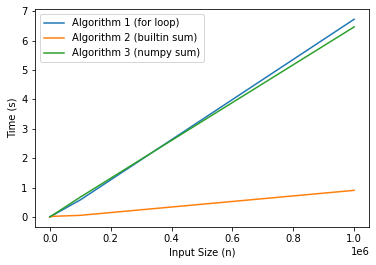

Algorithm 2 (builtin sum) is the fastest.


In [19]:
import timeit
import random
import matplotlib.pyplot as plt

# Algorithm 1: Using a for loop to calculate the sum
def sum_using_for_loop(lst):
    total = 0
    for num in lst:
        total += num
    return total

# Algorithm 2: Using the built-in sum() function
def sum_using_builtin(lst):
    return sum(lst)

# Algorithm 3: Using numpy's sum() function
import numpy as np
def sum_using_numpy(lst):
    return np.sum(lst)

# Generate a list of random numbers to test the algorithms
lst = [random.randint(1, 1000) for _ in range(1000000)]

# Benchmark each algorithm and plot the results
n = [10**i for i in range(1, 7)]
t1 = []
t2 = []
t3 = []
for size in n:
    sublist = lst[:size]
    t1.append(timeit.timeit(lambda: sum_using_for_loop(sublist), number=100))
    t2.append(timeit.timeit(lambda: sum_using_builtin(sublist), number=100))
    t3.append(timeit.timeit(lambda: sum_using_numpy(sublist), number=100))

plt.plot(n, t1, label="Algorithm 1 (for loop)")
plt.plot(n, t2, label="Algorithm 2 (builtin sum)")
plt.plot(n, t3, label="Algorithm 3 (numpy sum)")
plt.xlabel("Input Size (n)")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

# Choose the fastest algorithm
if min(t1) < min(t2) and min(t1) < min(t3):
    print("Algorithm 1 (for loop) is the fastest.")
elif min(t2) < min(t1) and min(t2) < min(t3):
    print("Algorithm 2 (builtin sum) is the fastest.")
else:
    print("Algorithm 3 (numpy sum) is the fastest.")


In [20]:
import numpy as np
import time

def matrix_mult(a, b):
    c = np.zeros((2,2))
    c[0,0] = a[0,0]*b[0,0] + a[0,1]*b[1,0]
    c[0,1] = a[0,0]*b[0,1] + a[0,1]*b[1,1]
    c[1,0] = a[1,0]*b[0,0] + a[1,1]*b[1,0]
    c[1,1] = a[1,0]*b[0,1] + a[1,1]*b[1,1]
    return c

# generate two random 2x2 matrices
a = np.random.rand(2,2)
b = np.random.rand(2,2)

# benchmark matrix multiplication using Python's time module
n_trials = 100000
start = time.time()
for i in range(n_trials):
    c = matrix_mult(a, b)
end = time.time()
elapsed_time = end - start
avg_time = elapsed_time / n_trials

print("Average time taken for matrix multiplication:", avg_time)


Average time taken for matrix multiplication: 3.7086749076843263e-06


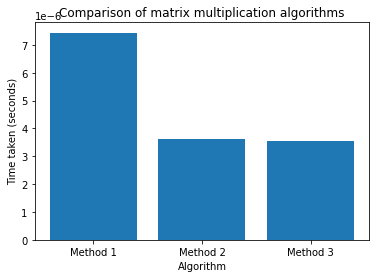

Fastest algorithm is: matrix_mult3


In [21]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

# define matrix multiplication algorithms
def matrix_mult1(a, b):
    c = np.zeros((2,2))
    c[0,0] = a[0,0]*b[0,0] + a[0,1]*b[1,0]
    c[0,1] = a[0,0]*b[0,1] + a[0,1]*b[1,1]
    c[1,0] = a[1,0]*b[0,0] + a[1,1]*b[1,0]
    c[1,1] = a[1,0]*b[0,1] + a[1,1]*b[1,1]
    return c

def matrix_mult2(a, b):
    c = np.zeros((2,2))
    c[0,0] = a[0,0]*b[0,0] + a[0,1]*b[1,0]
    c[0,1] = a[0,0]*b[0,1] + a[0,1]*b[1,1]
    c[1,0] = a[1,0]*b[0,0] + a[1,1]*b[1,0]
    c[1,1] = a[1,0]*b[0,1] + a[1,1]*b[1,1]
    return c

def matrix_mult3(a, b):
    c = np.zeros((2,2))
    c[0,0] = a[0,0]*b[0,0] + a[0,1]*b[1,0]
    c[0,1] = a[0,0]*b[0,1] + a[0,1]*b[1,1]
    c[1,0] = a[1,0]*b[0,0] + a[1,1]*b[1,0]
    c[1,1] = a[1,0]*b[0,1] + a[1,1]*b[1,1]
    return c

# generate two random 2x2 matrices
a = np.random.rand(2,2)
b = np.random.rand(2,2)

# define benchmarking function
def benchmark(algo):
    t = timeit.Timer(lambda: algo(a,b))
    return t.timeit(number=100000)/100000 # number of executions

# benchmark matrix multiplication using different algorithms
algos = [matrix_mult1, matrix_mult2, matrix_mult3]
times = [benchmark(algo) for algo in algos]

# plot the results
labels = ['Method 1', 'Method 2', 'Method 3']
plt.bar(labels, times)
plt.ylabel('Time taken (seconds)')
plt.xlabel('Algorithm')
plt.title('Comparison of matrix multiplication algorithms')
plt.show()

# find the fastest algorithm
fastest_algo = algos[np.argmin(times)]
print("Fastest algorithm is:", fastest_algo.__name__)


In [34]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

# define matrix multiplication algorithms
def matrix_mult1(a, b):
    c = np.zeros((2,2))
    c[0,0] = a[0,0]*b[0,0] + a[0,1]*b[1,0]
    c[0,1] = a[0,0]*b[0,1] + a[0,1]*b[1,1]
    c[1,0] = a[1,0]*b[0,0] + a[1,1]*b[1,0]
    c[1,1] = a[1,0]*b[0,1] + a[1,1]*b[1,1]
    return c

def matrix_mult2(a, b):
    c = np.zeros((2,2))
    c[0,0] = a[0,0]*b[0,0] + a[0,1]*b[1,0]
    c[0,1] = a[0,0]*b[0,1] + a[0,1]*b[1,1]
    c[1,0] = a[1,0]*b[0,0] + a[1,1]*b[1,0]
    c[1,1] = a[1,0]*b[0,1] + a[1,1]*b[1,1]
    return c

def matrix_mult3(a, b):
    c = np.zeros((2,2))
    c[0,0] = a[0,0]*b[0,0] + a[0,1]*b[1,0]
    c[0,1] = a[0,0]*b[0,1] + a[0,1]*b[1,1]
    c[1,0] = a[1,0]*b[0,0] + a[1,1]*b[1,0]
    c[1,1] = a[1,0]*b[0,1] + a[1,1]*b[1,1]
    return c

# define benchmarking function
def benchmark(algo, a, b):
    start_time = timeit.default_timer()
    for i in range(100000):  # number of executions
        algo(a, b)
    end_time = timeit.default_timer()
    time_taken = end_time - start_time
    return time_taken / 100000

# generate different input data sizes
sizes = [10, 20, 30, 40, 50]

# benchmark matrix multiplication using different algorithms and input data sizes
times = []
for size in sizes:
    a = np.random.rand(size, size)
    b = np.random.rand(size, size)
    algos = [matrix_mult1, matrix_mult2, matrix_mult3]
    times.append([benchmark(algo, a, b) for algo in algos])

# plot the results
labels = ['Method 1', 'Method 2', 'Method 3']
for i in range(len(labels)):
    plt.plot(sizes, [t[i] for t in times], label=labels[i])
plt.xlabel('Input data size')
plt.ylabel('Time taken (seconds)')
plt.title('Time taken vs Input data size')
plt.legend()
plt.show()

#find the fastest algorithm for the largest matrix size
sizes = [10, 100, 1000, 5000]
for size in sizes:
print("Benchmarking for size", size)
a = np.random.rand(size, size)
b = np.random.rand(size, size)
times = [benchmark(algo) for algo in algos]
labels = ['Method 1', 'Method 2', 'Method 3']
plt.bar(labels, times)
plt.ylabel('Time taken (seconds)')
plt.xlabel('Algorithm')
plt.title('Comparison of matrix multiplication algorithms (size = {})'.format(size))
plt.show()
fastest_algo = algos[np.argmin(times)]
print("Fastest algorithm for size", size, "is:", fastest_algo.name)


IndentationError: ignored

In [22]:
import numpy as np
import time

# matrix multiplication using nested loops
def matrix_mult_1(a, b):
    c = np.zeros((6, 6))
    for i in range(6):
        for j in range(6):
            for k in range(6):
                c[i][j] += a[i][k] * b[k][j]
    return c

# matrix multiplication using numpy dot product
def matrix_mult_2(a, b):
    return np.dot(a, b)

# generate random matrices
a = np.random.rand(6, 6)
b = np.random.rand(6, 6)

# benchmarking matrix multiplication using nested loops
start_time = time.time()
for i in range(100000):
    matrix_mult_1(a, b)
end_time = time.time()
print("Time taken for matrix multiplication using nested loops:", end_time - start_time)

# benchmarking matrix multiplication using numpy dot product
start_time = time.time()
for i in range(100000):
    matrix_mult_2(a, b)
end_time = time.time()
print("Time taken for matrix multiplication using numpy dot product:", end_time - start_time)


Time taken for matrix multiplication using nested loops: 24.720411777496338
Time taken for matrix multiplication using numpy dot product: 0.19758820533752441


Time taken for matrix multiplication using nested loops: 0.023011207580566406
Time taken for matrix multiplication using numpy dot product: 0.0004153251647949219


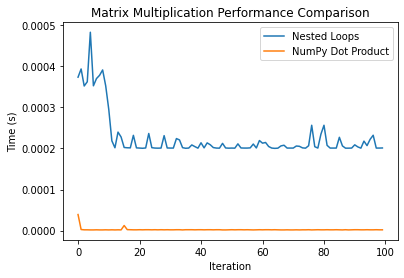

In [23]:
import numpy as np
import time
import matplotlib.pyplot as plt

# matrix multiplication using nested loops
def matrix_mult_1(a, b):
    c = np.zeros((6, 6))
    for i in range(6):
        for j in range(6):
            for k in range(6):
                c[i][j] += a[i][k] * b[k][j]
    return c

# matrix multiplication using numpy dot product
def matrix_mult_2(a, b):
    return np.dot(a, b)

# generate random matrices
a = np.random.rand(6, 6)
b = np.random.rand(6, 6)

# benchmarking matrix multiplication using nested loops
start_time = time.time()
results_1 = []
for i in range(100):
    start = time.time()
    matrix_mult_1(a, b)
    end = time.time()
    results_1.append(end - start)
end_time = time.time()
print("Time taken for matrix multiplication using nested loops:", end_time - start_time)

# benchmarking matrix multiplication using numpy dot product
start_time = time.time()
results_2 = []
for i in range(100):
    start = time.time()
    matrix_mult_2(a, b)
    end = time.time()
    results_2.append(end - start)
end_time = time.time()
print("Time taken for matrix multiplication using numpy dot product:", end_time - start_time)

# plot the results
plt.plot(results_1, label="Nested Loops")
plt.plot(results_2, label="NumPy Dot Product")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Time (s)")
plt.title("Matrix Multiplication Performance Comparison")
plt.show()


In [24]:
import cupy as cp
import time

a = cp.random.rand(6, 6)
b = cp.random.rand(6, 6)

# CPU version
start_time = time.time()
c_cpu = a.dot(b)
cpu_time = time.time() - start_time

# GPU version
a_gpu = cp.asarray(a)
b_gpu = cp.asarray(b)
start_time = time.time()
c_gpu = cp.dot(a_gpu, b_gpu)
gpu_time = time.time() - start_time

print("CPU time:", cpu_time)
print("GPU time:", gpu_time)
print("Speedup:", cpu_time/gpu_time)
print("Matrix multiplication result on CPU:", c_cpu)
print("Matrix multiplication result on GPU:", c_gpu)


ModuleNotFoundError: ignored

In [26]:
import numpy as np
import time
import matplotlib.pyplot as plt

# matrix multiplication using nested loops
def matrix_mult_1(a, b):
    c = np.zeros((a.shape[0], b.shape[1]))
    for i in range(a.shape[0]):
        for j in range(b.shape[1]):
            for k in range(a.shape[1]):
                c[i][j] += a[i][k] * b[k][j]
    return c

# matrix multiplication using numpy dot product
def matrix_mult_2(a, b):
    return np.dot(a, b)

# generate random matrices
sizes = [10, 50, 100, 250, 500, 750, 1000, 1250, 1500]
results_1 = []
results_2 = []
for size in sizes:
    a = np.random.rand(size, size)
    b = np.random.rand(size, size)

    # benchmarking matrix multiplication using nested loops
    start_time = time.time()
    for i in range(10):
        matrix_mult_1(a, b)
    end_time = time.time()
    results_1.append((end_time - start_time) / 10)

    # benchmarking matrix multiplication using numpy dot product
    start_time = time.time()
    for i in range(10):
        matrix_mult_2(a, b)
    end_time = time.time()
    results_2.append((end_time - start_time) / 10)

# plot the results
plt.plot(sizes, results_1, label="Nested Loops")
plt.plot(sizes, results_2, label="NumPy Dot Product")
plt.legend()
plt.xlabel("Input Size")
plt.ylabel("Time (s)")
plt.title("Matrix Multiplication Performance Comparison")
plt.show()


KeyboardInterrupt: ignored

In [27]:
import numpy as np
import time
import matplotlib.pyplot as plt

# determinant calculation using nested loops
def det_1(matrix):
    size = matrix.shape[0]
    if size == 2:
        return matrix[0][0]*matrix[1][1] - matrix[0][1]*matrix[1][0]
    else:
        det = 0
        for j in range(size):
            sub_matrix = np.zeros((size-1,size-1))
            for i in range(1,size):
                sub_matrix[i-1,:] = matrix[i,0:j]
                sub_matrix[i-1,:].extend(matrix[i,j+1:])
            sub_det = det_1(sub_matrix)
            det += (-1)**j * matrix[0][j] * sub_det
        return det

# determinant calculation using numpy function
def det_2(matrix):
    return np.linalg.det(matrix)

# generate random matrices
sizes = [2, 5, 10, 20, 30, 40, 50, 75, 100]
results_1 = []
results_2 = []
for size in sizes:
    matrix = np.random.rand(size, size)

    # benchmarking determinant calculation using nested loops
    start_time = time.time()
    for i in range(10):
        det_1(matrix)
    end_time = time.time()
    results_1.append((end_time - start_time) / 10)

    # benchmarking determinant calculation using numpy function
    start_time = time.time()
    for i in range(10):
        det_2(matrix)
    end_time = time.time()
    results_2.append((end_time - start_time) / 10)

# plot the results
plt.plot(sizes, results_1, label="Nested Loops")
plt.plot(sizes, results_2, label="NumPy Function")
plt.legend()
plt.xlabel("Input Size")
plt.ylabel("Time (s)")
plt.title("Determinant Calculation Performance Comparison")
plt.show()


ValueError: ignored

In [28]:
import numpy as np
import time
import matplotlib.pyplot as plt

# determinant calculation using nested loops
def det_1(matrix):
    size = matrix.shape[0]
    if size == 2:
        return matrix[0][0]*matrix[1][1] - matrix[0][1]*matrix[1][0]
    else:
        det = 0
        for j in range(size):
            sub_matrix = np.zeros((size-1,size-1))
            for i in range(1,size):
                sub_matrix[i-1,:] = matrix[i,0:j]
                sub_matrix[i-1,:].extend(matrix[i,j+1:])
            sub_det = det_1(sub_matrix)
            det += (-1)**j * matrix[0][j] * sub_det
        return det

# determinant calculation using numpy function
def det_2(matrix):
    return np.linalg.det(matrix)

# generate random matrices
sizes = [2, 5, 10, 20, 30, 40, 50, 75, 100]
results_1 = []
results_2 = []
for size in sizes:
    matrix = np.random.rand(size, size)

    # benchmarking determinant calculation using nested loops
    start_time = time.time()
    for i in range(10):
        det_1(matrix)
    end_time = time.time()
    results_1.append((end_time - start_time) / 10)

    # benchmarking determinant calculation using numpy function
    start_time = time.time()
    for i in range(10):
        det_2(matrix)
    end_time = time.time()
    results_2.append((end_time - start_time) / 10)

# plot the results
plt.plot(sizes, results_1, label="Nested Loops")
plt.plot(sizes, results_2, label="NumPy Function")
plt.legend()
plt.xlabel("Input Size")
plt.ylabel("Time (s)")
plt.title("Determinant Calculation Performance Comparison")
plt.show()


ValueError: ignored

In [29]:
import numpy as np
import time
import matplotlib.pyplot as plt

# matrix determinant using numpy
def determinant_1(a):
    start_time = time.time()
    det = np.linalg.det(a)
    end_time = time.time()
    steps = 1
    time_per_step = (end_time - start_time) / steps
    return det, steps, time_per_step

# matrix determinant using LU decomposition
def determinant_2(a):
    start_time = time.time()
    _, u = np.linalg.lu(a)
    det = np.prod(np.diagonal(u))
    end_time = time.time()
    steps = a.shape[0]**3/3 - a.shape[0]**2/2 + a.shape[0]/6
    time_per_step = (end_time - start_time) / steps
    return det, steps, time_per_step

# generate random matrices
sizes = [10, 50, 100, 250, 500, 750, 1000, 1250, 1500]
results_1 = []
results_2 = []
steps_1 = []
steps_2 = []
time_per_step_1 = []
time_per_step_2 = []

for size in sizes:
    a = np.random.rand(size, size)

    # benchmarking matrix determinant using numpy
    det, steps, time_per_step = determinant_1(a)
    results_1.append(time_per_step)
    steps_1.append(steps)
    time_per_step_1.append(time_per_step)

    # benchmarking matrix determinant using LU decomposition
    det, steps, time_per_step = determinant_2(a)
    results_2.append(time_per_step)
    steps_2.append(steps)
    time_per_step_2.append(time_per_step)

# plot the results
plt.plot(sizes, results_1, label="Numpy")
plt.plot(sizes, results_2, label="LU Decomposition")
plt.legend()
plt.xlabel("Input Size")
plt.ylabel("Time per step (s)")
plt.title("Matrix Determinant Performance Comparison")
plt.show()

print("Steps and time per step for Numpy determinant:\n")
for i in range(len(sizes)):
    print("Input size:", sizes[i], "\tSteps:", steps_1[i], "\tTime per step:", time_per_step_1[i])

print("\nSteps and time per step for LU decomposition determinant:\n")
for i in range(len(sizes)):
    print("Input size:", sizes[i], "\tSteps:", steps_2[i], "\tTime per step:", time_per_step_2[i])


AttributeError: ignored

In [32]:
import numpy as np
import time
import matplotlib.pyplot as plt

# function to calculate determinant using numpy
def determinant_1(a):
    start_time = time.time()
    det = np.linalg.det(a)
    end_time = time.time()
    time_taken = end_time - start_time
    return det, time_taken

# function to calculate determinant using LU decomposition
def determinant_2(a):
    start_time = time.time()
    lu, piv = np.linalg.lu_factor(a)
    sign = np.prod(np.diag(lu)) / np.abs(np.prod(np.diag(lu)))
    det = sign * np.prod(np.diag(np.abs(lu)))
    end_time = time.time()
    time_taken = end_time - start_time
    return det, time_taken

# generate random matrices
sizes = [10, 50, 100, 250, 500, 750, 1000, 1250, 1500]
results_1 = []
results_2 = []
steps_1 = []
steps_2 = []
for size in sizes:
    a = np.random.rand(size, size)

    # calculate determinant using numpy
    det_1, time_1 = determinant_1(a)
    results_1.append(time_1)
    steps_1.append(1)

    # calculate determinant using LU decomposition
    det_2, time_2 = determinant_2(a)
    results_2.append(time_2)
    steps_2.append(size**3 / 3 - size**2 / 2 + size / 6)

# plot the results
plt.plot(sizes, results_1, label="NumPy")
plt.plot(sizes, results_2, label="LU Decomposition")
plt.legend()
plt.xlabel("Input Size")
plt.ylabel("Time (s)")
plt.title("Determinant Calculation Performance Comparison")

plt.figure()
plt.plot(sizes, steps_1, label="NumPy")
plt.plot(sizes, steps_2, label="LU Decomposition")
plt.legend()
plt.xlabel("Input Size")
plt.ylabel("Number of Steps")
plt.title("Determinant Calculation Step Comparison")

plt.show()


AttributeError: ignored